# Importing Packages

In [211]:
import matplotlib.pyplot as plt
from networkx_viewer import Viewer
import matplotlib.colors as mcolors
from collections import defaultdict
import networkx as nx 


%matplotlib inline

In [212]:
def draw(G, measures, measure_name):
  #* https://stackoverflow.com/a/52013202
  #* https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html
  #* https://www.datacamp.com/community/tutorials/social-network-analysis-python

  #* Create two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  pos = nx.spring_layout(G)

  #* Set the size of each node based on its corresponding measure value.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, 
                                  cmap=plt.cm.plasma,
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  
  #* Draw the edges of the graph.
  edges = nx.draw_networkx_edges(G, pos)
  
  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, blue color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='blue', style='dashed')

  #* Add labels to the nodes with a font size of 10, blue color, and sans-serif font family.
  #nx.draw_networkx_labels(G, pos, font_size=10, font_color='blue', font_family='sans-serif')
  
  #* Set the title of the plot, add a color bar, turn off the axis, and display the plot.
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()


In [213]:
def plot_G(G, measures):
  #* Define two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  #* This layout treats edges as springs holding nodes close, while treating nodes as repelling objects.
  pos = nx.spring_layout(G)
  
  #* Set the size of each node based on its corresponding measure value.
  #* The size is multiplied by 1000 for better visibility.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                                cmap=plt.cm.plasma,
                                node_color=list(measures.values()),
                                nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  #* This can be useful if the measure values vary widely.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))

  #* Draw the nodes of the graph again with a fixed size of 50 and a color map of 'plt.cm.plasma'.
  nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.plasma)

  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, blue color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='blue', style='dashed')

  #* Add labels to the nodes with a font size of 10, black color, and sans-serif font family.
  nx.draw_networkx_labels(G ,pos, font_size=10, font_color='black', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')
  plt.show()

In [214]:
def plot_Gp(G, measures):
  # Set the figure size to make the plot high-definition.
  plt.figure(figsize=(50, 50), dpi=300)

  #* Define two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  #* This layout treats edges as springs holding nodes close, while treating nodes as repelling objects.
  pos = nx.spring_layout(G, iterations=13, scale=300, seed=1234)

  #* Set the size of each node based on its corresponding measure value.
  #* The size is multiplied by 1000 for better visibility.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  #* This can be useful if the measure values vary widely.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))

  #* Create a color map based on the node labels.
  #* Different labels are mapped to different colors. 
  # color_map = []
  # for node in G:
  #   if 'fac' in node:
  #       color_map.append('blue')
  #   elif 'stu' in node:
  #       color_map.append('green')
  #   elif 'adm' in node:
  #       color_map.append('yellow')
  #   elif 'sub' in node:
  #       color_map.append('orange')
  #   elif 'isp' in node:
  #       color_map.append('red')
  #   elif 'bis' in node:
  #       color_map.append('purple')
  #   elif 'par' in node:
  #       color_map.append('black')
  #   elif 'sup' in node:
  #       color_map.append('aqua')
  #   elif node in ['grade', 'assignment', 'Bulletin Board', 're-assign', 'enroll', 'register', 'transfer', 'drop']:
  #       color_map.append('gray')  # white for the specific nodes
  #   else:
  #       print (node)


  # Add the 'color' attribute to the nodes based on the node labels
  color_map = {}
  for node in G.nodes:
      node_str = str(node)
      if 'fac' in node_str:
          color_map[node] = 'blue'
      elif 'stu' in node_str:
          color_map[node] = 'green'
      elif 'adm' in node_str:
          color_map[node] = 'yellow'
      elif 'sub' in node_str:
          color_map[node] = 'orange'
      elif 'isp' in node_str:
          color_map[node] = 'red'
      elif 'bis' in node_str:
          color_map[node] = 'purple'
      elif 'par' in node_str:
          color_map[node] = 'black'
      elif 'sup' in node_str:
          color_map[node] = 'aqua'
      elif node_str in ['assignment', 'attendance', 'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register', 'like', 'happy', 'surprise', 'sad','angry', 'room_', 'commented']:
          color_map[node] = 'gray'
      else:
          print(node_str)

  #* Draw the nodes of the graph again with a fixed size of 10 and a color map based on the node labels.
  nx.draw_networkx_nodes(G, pos, node_size=10, node_color=color_map, cmap=plt.cm.plasma)

  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2 and gray color.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, gray color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color='gray', width=1)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='gray', style='dashed')

  #* Add labels to the nodes with a font size of 10, gray color, and sans-serif font family.
  nx.draw_networkx_labels(G, pos, font_size=3, font_color='black', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')

  #* Increase the DPI to 300 for a high-quality plot.
  plt.savefig("network.png", dpi=300)
  
  #* Display the plot 
  plt.show()


In [215]:
def writeandrender(filename, centrality):
  #* Extract the measure from the centrality dictionary.
  cmeasure = centrality["measure"]
  
  #* Sort the items in the measure dictionary in descending order based on their values.
  sorted_x = sorted(cmeasure.items(), key=lambda kv: kv[1], reverse=True)

  #* Check the 'overwrite' flag in the centrality dictionary.
  #* If it's True, open the file in write mode, which overwrites the existing content.
  #* If it's False, open the file in append mode, which adds to the existing content.
  if centrality["overwrite"]:
      f = open(filename + centrality["prefix"] + ".txt", 'w')
  else:
      f = open(filename + centrality["prefix"] + ".txt", 'a')
  
  #* Write the sorted items to the file.
  f.write(str(sorted_x))
  
  #* Close the file.
  f.close()

  #* Draw the weighted graph with the measure and the name from the centrality dictionary.
  draw(G, centrality["measure"], centrality["name"])

# Data Extraction for the Whole Month of October 2020

In [216]:
import pandas as pd

# Load the data into a pandas DataFrame
cs_dept_computer = 'C:/Users/IIT_C/OneDrive/Desktop/social_network_analysis/SNA_code/raw_data.csv'
mark_desktop = 'C:/Users/boyma/OneDrive/Desktop/learning_interactions/SNA_code/raw_data.csv' 
df = pd.read_csv(mark_desktop)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Define start and end date
start_date = '2020-10-05'
end_date = '2020-10-31'

# Filter rows based on date range
mask = (df['ts'] >= start_date) & (df['ts'] <= end_date)
df = df.loc[mask]

C:\Users\boyma\AppData\Local\Temp\ipykernel_25260\1231431923.py:6: DtypeWarning: Columns (1,2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(mark_desktop)


# Data Filtration Phase

- Removing the generic users from the dataset: "7505d64a54e061b7acd54ccd58b49dc43500b635"

In [217]:
# Print the number of rows before removing
print(f"Number of rows before removing: {len(df)}")

# Remove rows where 'receiverid' is "7505d64a54e061b7acd54ccd58b49dc43500b635"
df = df[df['receiverid'] != "7505d64a54e061b7acd54ccd58b49dc43500b635"]

# Print the number of rows after removing
print(f"Number of rows after removing: {len(df)}")


Number of rows before removing: 167105
Number of rows after removing: 165801


- Removing the string: 'Associate Post and Entry' and 'get post and entry link ' from the dataset

In [218]:
# Print the number of rows before removing
print(f"Number of rows before removing: {len(df)}")

# Remove rows where 'type_' is 'Associate Post and Entry' or 'get post and entry link'
df = df[~df['type_'].isin(['Associate Post and Entry', 'get post and entry link '])]

# Print the number of rows after removing
print(f"Number of rows after removing: {len(df)}")


Number of rows before removing: 165801
Number of rows after removing: 165736


### Export into CSV to check whether the date filtration is successful

In [219]:
# Export the DataFrame to a CSV file
df.to_csv('filtered_date_data.csv', index=False)

# Data Transformation Phase
- Transform the data from "reactions" column into their string equivalents in a new column called "emoji"



In [220]:
# Define a mapping from integers to emoji names
reaction_mapping = {
    1: 'like',
    2: 'happy',
    3: 'surprise',
    4: 'sad',
    5: 'angry'
}

# Create a new column 'emoji' by mapping the 'reaction' column to the corresponding emoji names
df['emoji'] = df['reaction'].map(reaction_mapping)


- Transform the rest of the dataset 

In [221]:
import numpy as np

# Define a function to clean the data
def clean_data(x):
    if isinstance(x, str):
        if 'get assignment' in x:
            return 'get_assignment'
        elif 'get raw scores' in x:
            return 'get_raw_scores'
        elif 'get student answer' in x:
            return 'get_student_answer'
        elif 'Joined' in x and 'for Video Conference' in x:
            return 'joined_video_conference'
        elif 'view submission' in x:
            return 'view_submission'
        else:
            return x  # return the original string if it doesn't match any pattern
    return np.nan  # return NaN for non-string data

# Apply the function to the 'type_' column
df['type_'] = df['type_'].apply(clean_data)


### Export to a new csv file to check whether the transformation is sucessful

In [222]:
# Write the DataFrame to a CSV file
df.to_csv('transformed_data.csv', index=False)


# Anonymize the users

In [223]:
import hashlib
import pandas as pd

def anonymize_id(id):
    if pd.isnull(id):
        return ''
    prefix = id[0]
    hash_object = hashlib.sha1(id.encode())
    hex_dig = hash_object.hexdigest()
    if prefix == 'A':
        return 'adm' + hex_dig[:5]
    elif prefix == 'F':
        return 'fac' + hex_dig[:5]
    elif prefix == 'S':
        return 'stu' + hex_dig[:5]
    elif prefix == 'P':
        return 'par' + hex_dig[:5]
    else:
        return 'unk' + hex_dig[:5]

# Create a dictionary to store the original IDs and their corresponding anonymized IDs
anonymized_ids = {}

# Get all unique IDs in the 'initiatorid', 'receiverid', 'reactor', and 'commenter' columns
unique_ids = pd.concat([df['initiatorid'], df['receiverid'], df['reactor'], df['commenter']]).dropna().unique()

# Create a mapping from the original IDs to the hashed IDs
for id in unique_ids:
    anonymized_ids[id] = anonymize_id(id)

# Replace the original IDs with the hashed IDs in the 'initiatorid', 'receiverid', 'reactor', and 'commenter' columns
for column in ['initiatorid', 'receiverid', 'reactor', 'commenter']:
    df[column] = df[column].map(anonymized_ids)


### Export to a new csv to check whether the anonymization is successful

In [224]:
# Write the DataFrame to a CSV file
df.to_csv('anon_data.csv', index=False)

## Mapping the Agent to Task Learning Interactions for the whole month of October 2020

In [225]:
import networkx as nx
import pandas as pd
import csv


# Create a directed graph
G = nx.Graph()

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Check if the IDs are not empty or null
    if pd.notnull(row['initiatorid']) and pd.notnull(row['receiverid']):
        # For Timeline Interactions
        if G.has_edge(row['initiatorid'], row['tltype']):
            G[row['initiatorid']][row['tltype']]['weight'] += 1
        else:
            G.add_edge(row['initiatorid'], row['tltype'], weight=1)
        
        if G.has_edge(row['tltype'], row['receiverid']):
            G[row['tltype']][row['receiverid']]['weight'] += 1
        else:
            G.add_edge(row['tltype'], row['receiverid'], weight=1)

    # For Reactions
    if pd.notnull(row['reactor']) and pd.notnull(row['emoji']):
        if row['reactor'] == row['initiatorid']:
            # Add edges from reactor to reaction and from reaction to receiver
            if G.has_edge(row['reactor'], row['emoji']):
                G[row['reactor']][row['emoji']]['weight'] += 1
            else:
                G.add_edge(row['reactor'], row['emoji'], weight=1)
            
            if G.has_edge(row['emoji'], row['receiverid']):
                G[row['emoji']][row['receiverid']]['weight'] += 1
            else:
                G.add_edge(row['emoji'], row['receiverid'], weight=1)
        elif row['reactor'] == row['receiverid']:
            # Add edges from reactor to reaction and from reaction to initiator
            if G.has_edge(row['reactor'], row['emoji']):
                G[row['reactor']][row['emoji']]['weight'] += 1
            else:
                G.add_edge(row['reactor'], row['emoji'], weight=1)
            
            if G.has_edge(row['emoji'], row['initiatorid']):
                G[row['emoji']][row['initiatorid']]['weight'] += 1
            else:
                G.add_edge(row['emoji'], row['initiatorid'], weight=1)

    # For Comments
    if pd.notnull(row['commenter']) and pd.notnull(row['initiatorid']):
        if G.has_edge(row['commenter'], row['initiatorid']):
            G[row['commenter']][row['initiatorid']]['weight'] += 1
        else:
            G.add_edge(row['commenter'], row['initiatorid'], weight=1)

    # For Process Mining
    if pd.notnull(row['initiatorid']) and pd.notnull(row['type_']):
        if G.has_edge(row['initiatorid'], row['type_']):
            G[row['initiatorid']][row['type_']]['weight'] += 1
        else:
            G.add_edge(row['initiatorid'], row['type_'], weight=1)

# Get a list of all isolated nodes
isolated_nodes = list(nx.isolates(G))

# Print the isolated nodes
print("Isolated nodes:", isolated_nodes)

# Calculate Eigenvector Centrality and Betweenness Centrality
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
betweenness = nx.betweenness_centrality(G)

# Add the centrality measures as attributes to the nodes
nx.set_node_attributes(G, eigenvector, 'eigenvector_centrality')
nx.set_node_attributes(G, betweenness, 'betweenness_centrality')

# Add the 'color' attribute to the nodes based on the node labels
color_map = {}
for node in G.nodes:
    node_str = str(node)
    if 'fac' in node_str:
        color_map[node] = '#0000FF'  # Blue
    elif 'stu' in node_str:
        color_map[node] = '#008000'  # Green
    elif 'adm' in node_str:
        color_map[node] = '#FFFF00'  # Yellow
    elif 'sub' in node_str:
        color_map[node] = '#A52A2A'  # Brown
    # elif 'isp' in node_str:
    #     color_map[node] = '#FF0000'  # Red
    # elif 'bis' in node_str:
    #     color_map[node] = '#800080'  # Purple
    elif 'par' in node_str:
        color_map[node] = '#00FF00'  # Lime Green
    # elif 'sup' in node_str:
    #     color_map[node] = '#00FFFF'  # Aqua
    elif node_str in ['like', 'happy', 'surprise', 'sad', 'angry']:
        color_map[node] = '#FFC0CB'  # Pink
    elif node_str in ['assignment', 'attendance', 'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register']:
        color_map[node] = '#808080'  # Gray
    else:
        color_map[node] = '#A52A2A'  # Brown (new color)

nx.set_node_attributes(G, color_map, 'color')

Isolated nodes: []


### Count the Edge Weights

In [226]:
# Function to check edge attributes in a table format
def edges_to_dataframe(G):
    edge_data = []
    for u, v, data in G.edges(data=True):
        edge_data.append({
            'Source': u,
            'Target': v,
            'Weight': data.get('weight', 1),
            'Color': G.nodes[u].get('color', 'unknown') + '-' + G.nodes[v].get('color', 'unknown')
        })
    return pd.DataFrame(edge_data)

# Convert edges to DataFrame
edges_df = edges_to_dataframe(G)

# Display the DataFrame
print(edges_df)

                Source               Target  Weight            Color
0             fac2f61d               enroll      36  #0000FF-#808080
1             fac2f61d  view Bulletin Board      25  #0000FF-#A52A2A
2             fac2f61d          view enroll       5  #0000FF-#A52A2A
3             fac2f61d       Bulletin Board       2  #0000FF-#808080
4             fac2f61d                 like       2  #0000FF-#FFC0CB
...                ...                  ...     ...              ...
6168     Main Tutorial             stu6e6ba       2  #A52A2A-#008000
6169     Main Tutorial             fac314d5       2  #A52A2A-#0000FF
6170     Main Tutorial             par35fac       1  #A52A2A-#0000FF
6171  view collaborate             fac314d5       9  #A52A2A-#0000FF
6172         re-assign             stuc1df2       2  #808080-#008000

[6173 rows x 4 columns]


### Top 20 Nodes with the highest degree

                       Node  Degree
0                    enroll    1540
1       view Bulletin Board     700
2                assignment     472
3             view calendar     410
4           view assignment     407
5            Bulletin Board     362
6               view enroll     318
7            Retrieve Exams     298
8   joined_video_conference     285
9                   comment     255
10               view grade     213
11                    react     195
12                     like     119
13                 register     112
14               attendance      63
15                    happy      56
16                 fac22eba      54
17                 facdbf59      52
18            view register      51
19                 fac9bb58      44


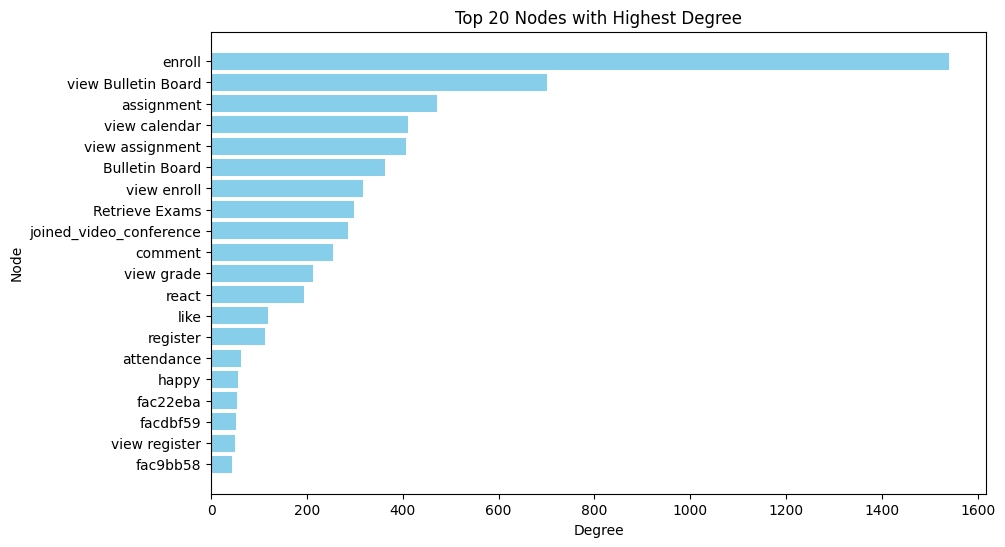

In [227]:
# Calculate degree of each node
degree_dict = dict(G.degree(G.nodes()))

# Sort nodes by degree
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Get top 20 nodes with highest degree
top_20_nodes = sorted_degree[:20]

# Create DataFrame of top 20 nodes
top_20_df = pd.DataFrame(top_20_nodes, columns=['Node', 'Degree'])

# Display the DataFrame
print(top_20_df)

# Plot distribution of degrees of top 20 nodes
plt.figure(figsize=(10, 6))
plt.barh(top_20_df['Node'], top_20_df['Degree'], color='skyblue')
plt.xlabel('Degree')
plt.ylabel('Node')
plt.title('Top 20 Nodes with Highest Degree')
plt.gca().invert_yaxis()
plt.show()

### Export the Graph into a GraphML file

In [228]:
nx.write_graphml_lxml(G, 'learning_interactions_oct.graphml')

### Replace the GraphML attribute ids

In [229]:
import re

def replace_graphml_attribute_ids(filename, replacements):
    with open(filename, 'r') as file:
        data = file.read()

    for old, new in replacements.items():
        data = re.sub(f'key id="d{old}"', f'key id="{new}"', data)
        data = re.sub(f'<data key="d{old}">', f'<data key="{new}">', data)

    with open(filename, 'w') as file:
        file.write(data)

# Usage:
replace_graphml_attribute_ids('C:/Users/boyma/OneDrive/Desktop/learning_interactions/SNA_code/october_2020/learning_interactions_oct.graphml', {0: 'eigenvectorCentrality', 1: 'betweennessCentrality'})


# Visualize the Network

In [230]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.degree_centrality(G))

In [231]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.betweenness_centrality(G))

In [232]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.eigenvector_centrality(G))

# Basic Topological Attributes

In [233]:
print(G)

Graph with 2252 nodes and 6173 edges


In [234]:
# Graph Density
density = nx.density(G)

print("Network density:", density)

Network density: 0.0024354677968268295


# Centrality Measures 

## Degree Centrality 

In [235]:
#* Calculate the degree centrality of the graph.
degree = nx.degree_centrality(G)

In [236]:
#* Draw the graph with node sizes proportional to their degree centrality.
#draw(G, degree, 'Degree Centrality')

In [237]:
#* Sort the nodes by their degree centrality and print the sorted list.
x = degree
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('enroll', 0.6841403820524211)
('view Bulletin Board', 0.3109729009329187)
('assignment', 0.20968458462905373)
('view calendar', 0.1821412705464238)
('view assignment', 0.18080852954242557)
('Bulletin Board', 0.16081741448245224)
('view enroll', 0.14127054642381162)
('Retrieve Exams', 0.13238560639715682)
('joined_video_conference', 0.12661039537983118)
('comment', 0.11328298533984896)
('view grade', 0.09462461128387382)
('react', 0.0866281652598845)
('like', 0.052865393158596174)
('register', 0.04975566414926699)
('attendance', 0.02798756108396268)
('happy', 0.024877832074633496)
('fac22eba', 0.023989338071968014)
('facdbf59', 0.02310084406930253)
('view register', 0.02265659706796979)
('fac9bb58', 0.019546868058640605)
('fac8a4fe', 0.01776988005330964)
('Main Tutorial', 0.012883163038649488)
('face5646', 0.011994669035984007)
('view event', 0.011550422034651266)
('facb8f11', 0.011106175033318524)
('faccdfbd', 0.009773434029320302)
('fac834bd', 0.009773434029320302)
('facf3e98', 0.008

### Nodes with Top Degree Centrality Scores

In [238]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('degree_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Degree_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Degree_Centrality': item[1]})

## Eigenvector Centrality 

In [239]:
#* Calculate the eigenvector centrality of the graph.
#eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

In [240]:
#* Draw the graph with node sizes proportional to their eigenvector centrality.
#draw(G, eigenvector, 'Eigenvector Centrality')

In [241]:
#* Sort the nodes by their betweenness centrality and print the sorted list.
x = eigenvector
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('view Bulletin Board', 0.3175337688266545)
('enroll', 0.31710384962371724)
('assignment', 0.2444406304201492)
('view assignment', 0.22984426339397293)
('view calendar', 0.21545883708087182)
('Retrieve Exams', 0.1686744698977821)
('view enroll', 0.16414179023282888)
('joined_video_conference', 0.14581677409095398)
('comment', 0.14323670988314494)
('view grade', 0.1176790982821869)
('react', 0.10627957926552571)
('like', 0.07607483332394152)
('fac22eba', 0.06042336539285022)
('fac8a4fe', 0.054974224125787445)
('facdbf59', 0.05396198168545584)
('fac9bb58', 0.04426975163297537)
('face5646', 0.043634974651225525)
('stu29fd4', 0.043275881664689084)
('studb263', 0.04213162619249659)
('stue8802', 0.04160744898729936)
('stu99aee', 0.04140993466186076)
('stu044df', 0.04114699062001394)
('stu13a64', 0.04113877004317277)
('stu64e4d', 0.04104114748969782)
('stua2227', 0.0410150471519685)
('stu22db6', 0.04100602976450064)
('stu9f0c5', 0.040894477891649655)
('stu39df2', 0.040542623881936676)
('stuca

### Nodes with Top Eigenvector Centrality Scores

In [242]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('eigenvector_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Influence_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Influence_Centrality': item[1]})

## Betweenness Centrality 

In [243]:
#* Calculate the betweenness centrality of the graph.
#betweenness = nx.betweenness_centrality(G)

In [244]:
#* Draw the graph with node sizes proportional to their betweenness centrality.
#draw(G, betweenness, 'Betweenness Centrality')

In [245]:
#* Sort the nodes by their betweenness centrality and print the sorted list.
x = nx.betweenness_centrality(G)
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('enroll', 0.7778360904447064)
('Bulletin Board', 0.22048866445741072)
('view Bulletin Board', 0.14649087055651247)
('assignment', 0.04608782627275164)
('view calendar', 0.03543134249153058)
('fac22eba', 0.025381180587251178)
('view assignment', 0.023770057861521112)
('view enroll', 0.022517645064719326)
('joined_video_conference', 0.02108438176862386)
('Retrieve Exams', 0.011312396628514434)
('react', 0.011277058012527347)
('comment', 0.011102485044608026)
('view grade', 0.010540357750361032)
('fac355e1', 0.010079811066687682)
('fac8a4fe', 0.008749420547376955)
('facf3e98', 0.007494523072342623)
('grade', 0.007096895207068462)
('register', 0.006702289156393542)
('face5646', 0.0062235228273782705)
('faccf869', 0.006093873619264189)
('fac834bd', 0.0060418909125578985)
('facdbf59', 0.005709375854269162)
('fac9bb58', 0.004696980701585287)
('fac38595', 0.004614672301524605)
('faccf734', 0.004433755607647153)
('facd44d5', 0.004243289850899184)
('fac98c90', 0.004233959822189228)
('fac90f7d',

### Nodes with Top Betweenness Scores

In [246]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('betweenness_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Betweenness_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Betweenness_Centrality': item[1]})